### Requester Decisions
In this notebook, we will see how the good behavior of the requester will affect the decrease of his inventory. we have considered the initial balance
as 20 ether units. you can see the decision tree of the requester below:

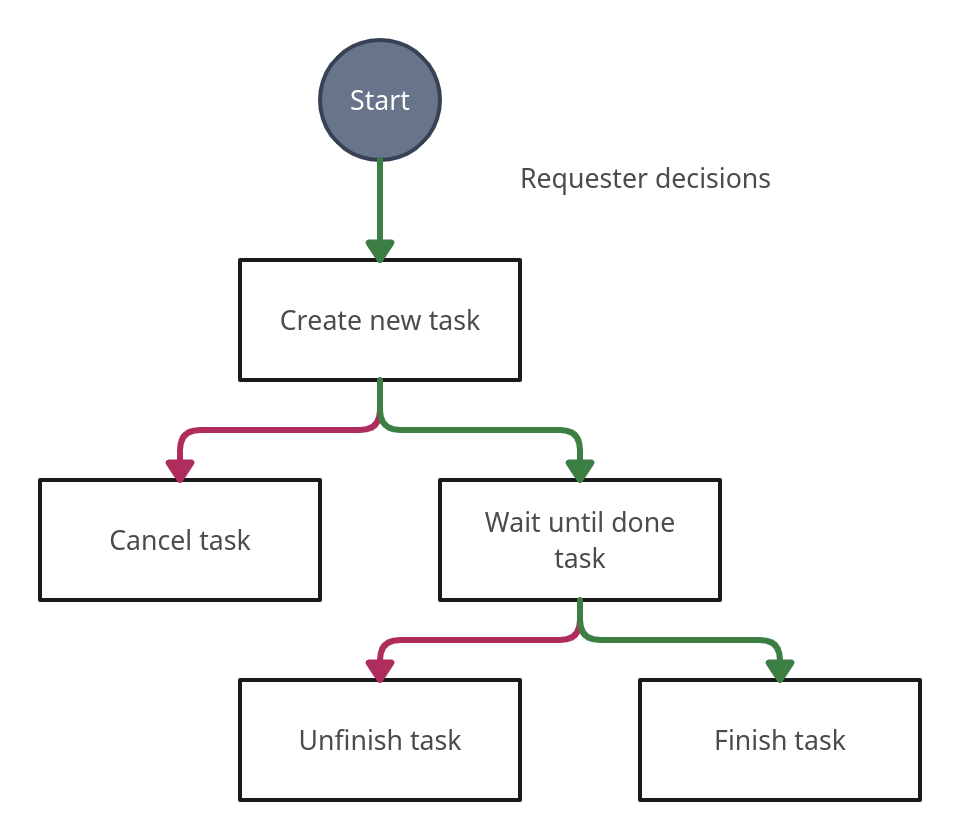

green lines represent good behavior and red lines represent bad behavior. note that we consider it more bad behavior to unfinish a task than to cancel it.


In [250]:
import random as rand

taskProperties = [
  (4, 2, 2),
  (5, 3, 2),
  (5, 2, 2),
  (6, 3, 4),
  (7, 3, 4),
  (7, 3, 3),
  (8, 4, 6),
  (9, 5, 4),
  (11, 10, 9),
  (13, 7, 8),
  (15, 5, 6),
  (16, 8, 8),
  (17, 11, 10),
  (19, 11, 11),
  (20, 12, 13),
]

requesterInitialBalance = 20

def calculateRequesterBalance(decisionProbability):
  if decisionProbability < 0 or decisionProbability > 1:
    raise ValueError(decisionProbability, "Args must be between 0 and 1")
  else:
    result = 0
    for taskProperty in taskProperties:

      goodBehaviorProbability = rand.random()
      waitUntilTaskDoneProbability = goodBehaviorProbability / 10
      finishTaskProbability = goodBehaviorProbability * 9 / 10
      salary, requetserProofOfTrust, workerProofOfTrust = taskProperty

      # Requester waits until done task
      if waitUntilTaskDoneProbability <= decisionProbability:
        
        # Finish task by requester
        if finishTaskProbability <= decisionProbability:
          result = result + salary
        # Unfinish task
        else:
          repaymentRate = (salary + (requetserProofOfTrust / 4)) / (salary + requetserProofOfTrust)
          result = result + repaymentRate * (requetserProofOfTrust + salary) 
      # Requester cancels task
      else:
        result = result + requetserProofOfTrust / 5
  return requesterInitialBalance - (result / len(taskProperties))


Finally, we see that the more good behavior the requester is, the lower the amount of account reduction will be.

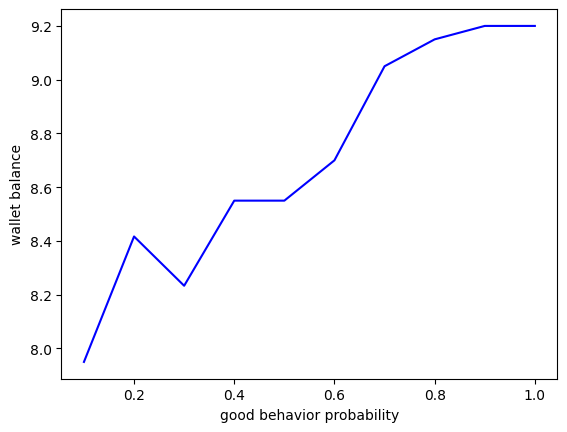

In [249]:
import matplotlib.pyplot as plt
import numpy as np

probabilities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
outputs = [calculateRequesterBalance(i) for i in probabilities]

plt.plot(probabilities, outputs, 'b-')
plt.xlabel("good behavior probability")
plt.ylabel("wallet balance")
plt.show()